<a href="https://colab.research.google.com/github/alezab/cs-ai/blob/master/AI_27_05_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD

In [85]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                 header=None, encoding='utf-8')
y = df.iloc[50:150, 4].values
y = np.where(y == 'Iris-versicolor', 0, 1)
X = df.iloc[50:150, :4].values
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_std.shape, y.shape

((100, 4), (100,))

In [86]:
model = Sequential()
model.add(Input(shape=(X_std.shape[1],)))
model.add(Dense(2, 'relu'))
model.add(Dense(1, 'sigmoid'))
model.compile(optimizer=SGD(learning_rate= 0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [87]:
fit = model.fit(X_std, y, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4929 - loss: 0.6987 
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7493 - loss: 0.6488
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8390 - loss: 0.6258 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8213 - loss: 0.5997
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8730 - loss: 0.5758
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8700 - loss: 0.5286
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8492 - loss: 0.5056
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8825 - loss: 0.4646 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8574 - loss: 0.4411
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8767 - loss: 0.4121
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9079 - loss: 0.3683
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8942 - 

In [88]:
pd.DataFrame(fit.history)

,accuracy,loss
0,0.49,0.696202
1,0.73,0.650328
2,0.85,0.623136
3,0.85,0.594321
4,0.87,0.567029
...,...,...
95,0.97,0.073555
96,0.98,0.072714
97,0.98,0.072509
98,0.97,0.071738


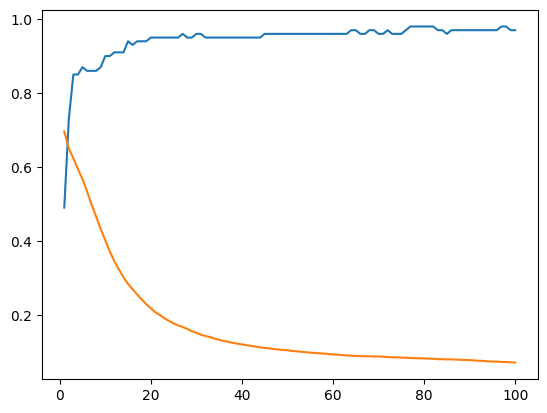

In [89]:
plt.plot(1+np.arange(100), pd.DataFrame(fit.history));

In [90]:
model.predict(X_std).round()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [91]:
X3 = df.iloc[:, :4].values
sc = StandardScaler()
X3_std = sc.fit_transform(X3)
y3 = y = df.iloc[:, 4].values
le = LabelEncoder()
y3 = le.fit_transform(y3)

In [92]:
X3_std.shape, y3.shape

((150, 4), (150,))

In [93]:
np.unique(y3)

array([0, 1, 2])

In [94]:
model3 = Sequential()
model3.add(Input(shape=(X3_std.shape[1],)))
model3.add(Dense(4, 'relu'))
model3.add(Dense(3, 'softmax'))
model3.compile(optimizer=SGD(learning_rate= 0.1),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [95]:
fit3 = model3.fit(X3_std, y3, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3372 - loss: 1.4655 
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3795 - loss: 1.0498
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4689 - loss: 0.9597
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6445 - loss: 0.8428
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6939 - loss: 0.7479
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6783 - loss: 0.7061
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7498 - loss: 0.6560
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7875 - loss: 0.6209
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7750 - loss: 0.5792
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8446 - loss: 0.4844
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8395 - loss: 0.4623
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8786 - l

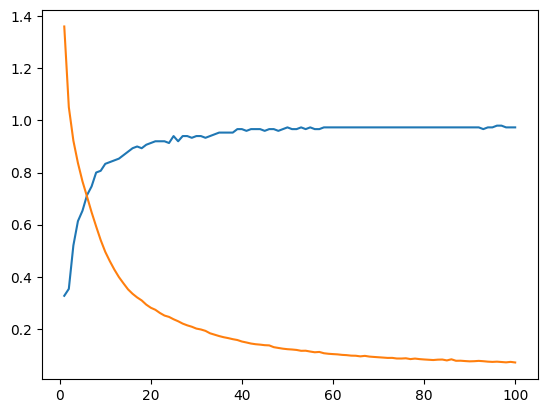

In [96]:
plt.plot(1+np.arange(100), pd.DataFrame(fit3.history));

In [100]:
model3.predict(X3_std).argmax(axis=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])